<a href="https://colab.research.google.com/github/athira-2006/MINIPROJECT/blob/main/MINIPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Symbolic Transfer Function H(s) = Vc(s)/Vin(s):
        1         
──────────────────
     2            
C⋅L⋅s  + C⋅R⋅s + 1

Natural frequency ω₀ = 31622.78 rad/s (5032.92 Hz)
Critical resistance Rₙ = 63.2456 Ω

Inverse Laplace Transform (step response, underdamped):
                         -5000.0⋅t                               -5000.0⋅t     ↪
1.0 - 0.160128153805087⋅ℯ         ⋅sin(31224.989991992⋅t) - 1.0⋅ℯ         ⋅cos ↪

↪                    
↪ (31224.989991992⋅t)


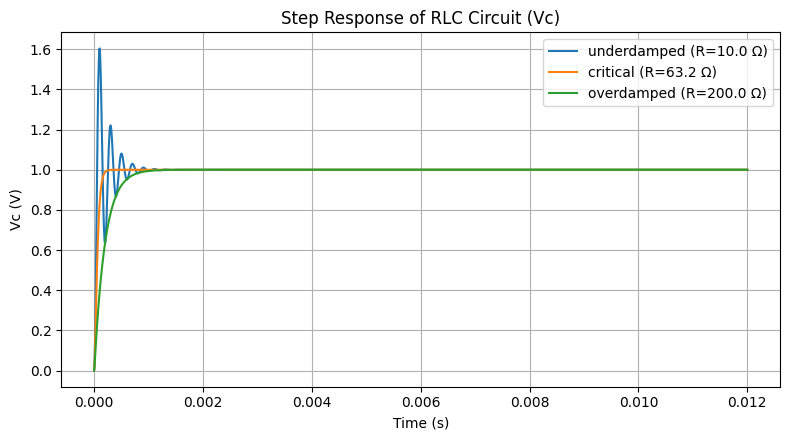

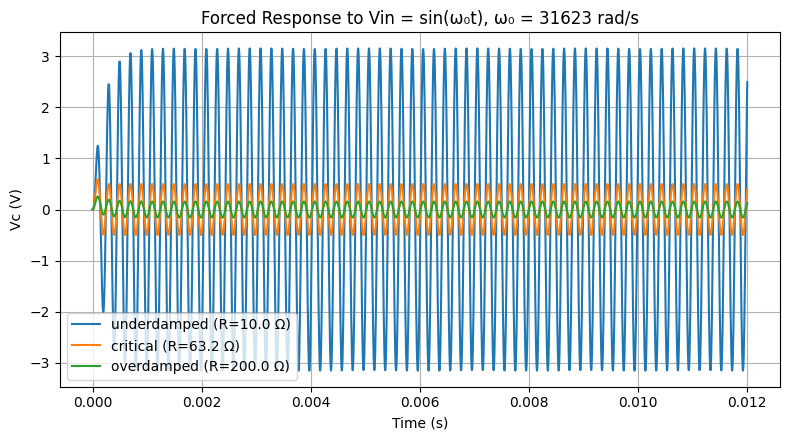

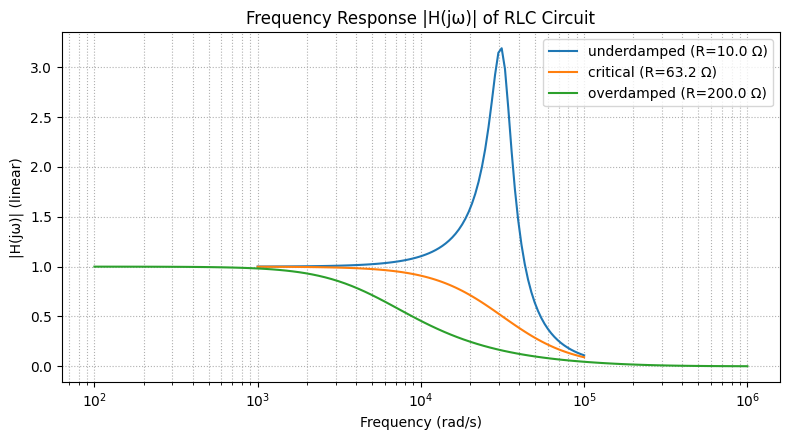


✅ Simulation complete!
Generated plots:
1️⃣ Step Response (Vc vs t)
2️⃣ Forced Sinusoidal Response
3️⃣ Frequency Response |H(jω)|


In [ ]:
# ============================================================
# CAPSTONE PROJECT: Modeling an RLC Circuit using Laplace Transform
# and Time-Domain Simulation (No Hardware Needed)
# ============================================================

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import signal

# -------------------------------
# 1. Symbolic derivation
# -------------------------------

# Define symbols
s, t = sp.symbols('s t', positive=True)
R, L, C = sp.symbols('R L C', positive=True)

# Transfer function Vc/Vin for a series RLC circuit
H_sym = 1 / (L*C*s**2 + R*C*s + 1)
print("Symbolic Transfer Function H(s) = Vc(s)/Vin(s):")
sp.pprint(H_sym)

# -------------------------------
# 2. Substitute numeric values
# -------------------------------
L_val = 1e-3   # H
C_val = 1e-6   # F

# Natural frequency and critical resistance
omega0 = 1 / np.sqrt(L_val * C_val)
R_crit = 2 * np.sqrt(L_val / C_val)

R_values = {
    'underdamped': 10.0,
    'critical': R_crit,
    'overdamped': 200.0
}

print(f"\nNatural frequency ω₀ = {omega0:.2f} rad/s ({omega0/(2*np.pi):.2f} Hz)")
print(f"Critical resistance Rₙ = {R_crit:.4f} Ω\n")

# -------------------------------
# 3. Symbolic inverse Laplace for underdamped case
# -------------------------------
R_ud = R_values['underdamped']
H_ud = H_sym.subs({R: R_ud, L: L_val, C: C_val})
Vin_step = 1/s
Vc_step_s = sp.simplify(H_ud * Vin_step)
Vc_t_ud = sp.inverse_laplace_transform(Vc_step_s, s, t)

print("Inverse Laplace Transform (step response, underdamped):")
sp.pprint(Vc_t_ud)

# -------------------------------
# 4. Numerical Simulation
# -------------------------------
t_end = 0.012
t_num = np.linspace(0, t_end, 2000)

step_responses = {}
sin_responses = {}
bode_data = {}

for key, R_val in R_values.items():
    num = [1.0]
    den = [L_val * C_val, R_val * C_val, 1.0]
    sys = signal.TransferFunction(num, den)

    # Step response
    t_out, y_step = signal.step(sys, T=t_num)
    step_responses[key] = (t_out, y_step)

    # Forced sinusoidal input
    u = np.sin(omega0 * t_num)
    t_out2, y_sin, _ = signal.lsim(sys, U=u, T=t_num)
    sin_responses[key] = (t_out2, y_sin)

    # Frequency response
    w, mag, phase = signal.bode(sys)
    bode_data[key] = (w, 10**(mag/20))

# -------------------------------
# 5. Plot Results
# -------------------------------

# Step response comparison
plt.figure(figsize=(8,4.5))
for key in R_values:
    t_out, y_step = step_responses[key]
    plt.plot(t_out, y_step, label=f"{key} (R={R_values[key]:.1f} Ω)")
plt.title("Step Response of RLC Circuit (Vc)")
plt.xlabel("Time (s)")
plt.ylabel("Vc (V)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Forced sinusoidal response
plt.figure(figsize=(8,4.5))
for key in R_values:
    t_out2, y_sin = sin_responses[key]
    plt.plot(t_out2, y_sin, label=f"{key} (R={R_values[key]:.1f} Ω)")
plt.title(f"Forced Response to Vin = sin(ω₀t), ω₀ = {omega0:.0f} rad/s")
plt.xlabel("Time (s)")
plt.ylabel("Vc (V)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Frequency response
plt.figure(figsize=(8,4.5))
for key in R_values:
    w, mag = bode_data[key]
    plt.semilogx(w, mag, label=f"{key} (R={R_values[key]:.1f} Ω)")
plt.title("Frequency Response |H(jω)| of RLC Circuit")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("|H(jω)| (linear)")
plt.grid(True, which='both', ls=':')
plt.legend()
plt.tight_layout()
plt.show()

print("\n✅ Simulation complete!")
print("Generated plots:")
print("1️⃣ Step Response (Vc vs t)")
print("2️⃣ Forced Sinusoidal Response")
print("3️⃣ Frequency Response |H(jω)|")
